In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Kaggle API kurulumu
!pip install -q kaggle

# kaggle.json dosyanı yükle (ilk defa çalıştırırken)
from google.colab import files
files.upload()

# Dosyayı uygun klasöre kopyala ve izin ver
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# Dataseti indir
!kaggle datasets download -d michelheusser/handwritten-digits-and-operators

# ZIP dosyasını aç
import zipfile
with zipfile.ZipFile("handwritten-digits-and-operators.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/CompleteImages")

print("✅ Dataset indirildi ve açıldı.")


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/michelheusser/handwritten-digits-and-operators
License(s): other
 64% 132M/205M [00:00<00:00, 1.38GB/s]
100% 205M/205M [00:00<00:00, 1.38GB/s]
✅ Dataset indirildi ve açıldı.


In [ ]:
import os
print("Root klasör içeriği:", os.listdir("/content/CompleteImages"))
print("İçindeki CompleteImages klasörü:", os.listdir("/content/CompleteImages/CompleteImages"))


Root klasör içeriği: ['CompleteDataSet_validation_tuples.npy', 'CompleteDataSet_testing_tuples.npy', 'CompleteDataSet_training_tuples.npy', 'CompleteDataSet_tuples.npy', 'CompleteImages']
İçindeki CompleteImages klasörü: ['All data (Compressed)']


In [ ]:
import os
for root, dirs, files in os.walk("/content/CompleteImages/CompleteImages/All data (Compressed)"):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print()
    break  # İlk seviyeyi görmek için


Root: /content/CompleteImages/CompleteImages/All data (Compressed)
Dirs: ['-', '6', '3', '4', '5', '*', '0', '2', '1', '[', '%', '8', '9', ']', '7', '+']
Files: []



In [ ]:
import os
for root, dirs, files in os.walk("/content/CompleteImages/CompleteImages/All data (Compressed)/8"):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print()
    break  # İlk seviyeyi görmek için


Root: /content/CompleteImages/CompleteImages/All data (Compressed)/8
Dirs: []
Files: ['8_1_15ccw_106_scaled_x1y1_2.png', '8_1_15cw_130.png', '8_1_17_scaled_x1_3y1.png', '8_3_8cw_10_scaled_x1_2y1_3.png', '8_2_15cw_116_scaled_x1_2y1.png', '8_1_8ccw_82_scaled_x1y1_2.png', '8_3_8ccw_15_scaled_x1y1_3.png', '8_2_15cw_138_scaled_x1y1_2.png', '8_3_15cw_69_scaled_x1_2y1_2.png', '8_2_35_scaled_x1_2y1.png', '8_2_15ccw_95.png', '8_2_15cw_52_scaled_x1_2y1_2.png', '8_2_8cw_18_scaled_x1_2y1.png', '8_3_8cw_129_scaled_x1y1_2.png', '8_3_101.png', '8_2_118_scaled_x1_2y1_3.png', '8_2_15ccw_48_scaled_x1y1_2.png', '8_2_15cw_103_scaled_x1_2y1_2.png', '8_2_8ccw_92_scaled_x1_2y1.png', '8_1_8cw_93.png', '8_3_15cw_111.png', '8_1_125_scaled_x1_2y1.png', '8_1_15ccw_66_scaled_x1_2y1_3.png', '8_1_8cw_35_scaled_x1_3y1_2.png', '8_1_15ccw_121_scaled_x1_3y1_2.png', '8_3_8ccw_126_scaled_x1y1_3.png', '8_2_15ccw_162_scaled_x1_2y1_3.png', '8_3_15ccw_124_scaled_x1_2y1_3.png', '8_3_8cw_109_scaled_x1y1_2.png', '8_2_8cw_123_sca

In [ ]:
!python /content/drive/MyDrive/Calculator/train.py


wandb: Currently logged in as: yagiz_hanaslan (yagiz_hanaslan-osti-m-teknik-niversitesi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.19.11
wandb: Run data is saved locally in /content/wandb/run-20250519_221700-tp59uq9g
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run soft-fog-26
wandb: ⭐️ View project at https://wandb.ai/yagiz_hanaslan-osti-m-teknik-niversitesi/calculator-recognition
wandb: 🚀 View run at https://wandb.ai/yagiz_hanaslan-osti-m-teknik-niversitesi/calculator-recognition/runs/tp59uq9g
📢 Eğitim başlıyor... Sınıf sayısı: 16
📦 Training Epoch 1/5: 100% 8348/8348 [01:40<00:00, 82.70it/s]
🔎 Validation Epoch 1/5: 100% 2087/2087 [00:21<00:00, 95.11it/s]
📊 Epoch 1 — Train Loss: 0.2252, Val Loss: 0.1133
📦 Training Epoch 2/5: 100% 8348/8348 [01:39<00:00, 83.51it/s]
🔎 Validation Epoch 2/5: 100% 2087/2087 [00:21<00:00, 96.90it/s]
📊 Epoch 2 — Train Loss: 0.0865, Val Loss: 0.0790
📦 Training Epoch 3/5: 10

In [ ]:
import torch
from model import SimpleCNN  # model.py dosyanın içinde tanımlı model
import os

# Model yolu
model_path = "/content/calculator_model.pth"

# Model dosyasının varlığını kontrol et
if not os.path.exists(model_path):
    print(f"Hata: Model dosyası '{model_path}' bulunamadı. Lütfen önceki adımlarda modelin kaydedildiğinden emin olun.")
else:
    # Modeli yükle
    num_classes = 16  # datasetindeki sınıf sayısına göre ayarla (senin için 16 doğru olabilir)
    model = SimpleCNN(num_classes)
    try:
        model.load_state_dict(torch.load(model_path))
        model.eval()
        print("✅ Model başarıyla yüklendi.")
        # Artık modeli test için kullanabilirsin
    except Exception as e:
        print(f"Model yüklenirken hata oluştu: {e}")

✅ Model başarıyla yüklendi.


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Calculator')


In [ ]:
import torch
from model import SimpleCNN  # model.py dosyanın içinde tanımlı model

# Model yolu
model_path = "/content/calculator_model.pth"

# Modeli yükle
num_classes = 16  # datasetindeki sınıf sayısına göre ayarla (senin için 16 doğru olabilir)
model = SimpleCNN(num_classes)
model.load_state_dict(torch.load(model_path))
model.eval()

# Artık modeli test için kullanabilirsin


SimpleCNN(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=8192, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=16, bias=True)
  )
)

In [ ]:
!pip install pyngrok streamlit

# Authtoken'ı ngrok'a tanıt
!ngrok authtoken 2xJsytnp64wr97ieABmISynScEw_2vGecSjTSAaWxCMWfpYLY

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


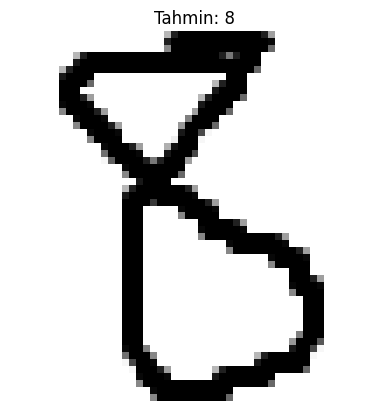

Tahmin skorları: [[-66.54935    -14.150775   -29.903666   -45.23422    -53.075775
  -46.600475   -20.650568   -19.317572   -15.144747    -7.0011134
   -0.92398566 -43.919807    30.44256     -7.565059   -36.019943
  -43.32061   ]]

✅ Tahmin edilen karakter: 8
Karakter sayısı: 1


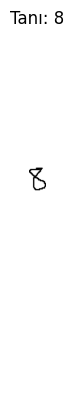

Tanınan karakterler: ['8']
Sonuç: 8


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from model import SimpleCNN  # Modelin sınıfı
import json
import numpy as np

# 🔧 Ayarlar
MODEL_PATH = "/content/calculator_model.pth"
LABEL_MAP_PATH = "/content/label_map.json"
TEST_IMAGE_PATH = "/content/drive/MyDrive/Calculator/test_image.png"  # Test edilecek görsel

# 🖼️ Görsel ön işleme (modelle uyumlu)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# 🧠 Modeli yükle
with open(LABEL_MAP_PATH, "r") as f:
    label_map = json.load(f)
inverse_map = {v: k for k, v in label_map.items()}
num_classes = len(label_map)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

def preprocess_paint_image(image):
    # Görseli numpy array'e çevir
    img_np = np.array(image)
    # Threshold uygula (siyah-beyaz ayrımı)
    img_bin = (img_np < 200).astype(np.uint8)  # 0: beyaz, 1: siyah
    # Sadece rakamın olduğu alanı bul (bounding box)
    coords = np.argwhere(img_bin)
    if coords.size == 0:
        # Hiçbir şey çizilmemişse orijinal resmi döndür
        return image
    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0) + 1  # slice için +1
    cropped = image.crop((x0, y0, x1, y1))
    # Kareye ortala
    max_side = max(cropped.size)
    new_img = Image.new("L", (max_side, max_side), 255)
    paste_x = (max_side - cropped.size[0]) // 2
    paste_y = (max_side - cropped.size[1]) // 2
    new_img.paste(cropped, (paste_x, paste_y))
    return new_img

# 🔍 Tahmin fonksiyonu
def predict(image_path):
    image = Image.open(image_path).convert("L")
    image = preprocess_paint_image(image)
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        predicted_idx = torch.argmax(output, 1).item()
        predicted_label = inverse_map[predicted_idx]

    # 🖼️ Görseli göster
    plt.imshow(image, cmap="gray")
    plt.title(f"Tahmin: {predicted_label}")
    plt.axis("off")
    plt.show()

    print("Tahmin skorları:", output.cpu().numpy())

    return predicted_label

# ▶️ Tahmin yap
pred = predict(TEST_IMAGE_PATH)
print(f"\n✅ Tahmin edilen karakter: {pred}")

def segment_characters(image):
    # Görseli numpy array'e çevir ve threshold uygula
    img_np = np.array(image)
    img_bin = (img_np < 200).astype(np.uint8)  # 0: beyaz, 1: siyah

    # Her sütunda siyah piksel var mı bak (projeksiyon)
    col_sum = img_bin.sum(axis=0)
    char_regions = []
    in_char = False
    start = 0

    for i, val in enumerate(col_sum):
        if val > 0 and not in_char:
            in_char = True
            start = i
        elif val == 0 and in_char:
            in_char = False
            end = i
            char_regions.append((start, end))

    # Son karakteri ekle
    if in_char:
        char_regions.append((start, len(col_sum)))

    # Her karakteri kırp ve listele
    chars = []
    for start, end in char_regions:
        char_img = image.crop((start, 0, end, image.height))
        chars.append(char_img)

    return chars

if __name__ == "__main__":
    # Karakter segmentasyonu testi
    image = Image.open(TEST_IMAGE_PATH).convert("L")
    chars = segment_characters(image)
    print(f"Karakter sayısı: {len(chars)}")

    recognized = []
    for i, c in enumerate(chars):
        # Her karakteri preprocess et ve modele ver
        proc = preprocess_paint_image(c)
        tensor = transform(proc).unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(tensor)
            idx = torch.argmax(output, 1).item()
            label = inverse_map[idx]
        recognized.append(label)
        plt.figure()
        plt.imshow(c, cmap="gray")
        plt.title(f"Tanı: {label}")
        plt.axis("off")
    plt.show()

    expr = "".join(recognized)
    print(f"Tanınan karakterler: {recognized}")
    expr = expr.replace(" ", "+").replace("-", "+")  # Gerekirse düzeltme
    try:
        result = eval(expr)
        print(f"Sonuç: {result}")
    except Exception as e:
        print(f"İfade hesaplanamadı: {e}")


In [ ]:
!pip install streamlit streamlit-drawable-canvas pyngrok --quiet


In [ ]:
!cp /content/drive/MyDrive/Calculator/model.py /content/


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import wandb

In [ ]:
%%writefile app.py
import streamlit as st
from streamlit_drawable_canvas import st_canvas
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
from model import SimpleCNN
import json

# 🔧 Dosya yolları
MODEL_PATH = "/content/calculator_model.pth"
LABEL_MAP_PATH = "/content/label_map.json"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🧠 Model yükleme
@st.cache(allow_output_mutation=True)
def load_model():
    with open(LABEL_MAP_PATH, "r") as f:
        label_map = json.load(f)
    inverse_map = {v: k for k, v in label_map.items()}
    num_classes = len(label_map)
    model = SimpleCNN(num_classes)
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.to(device)
    model.eval()
    return model, inverse_map

model, inverse_map = load_model()

# 🔁 Görsel dönüşüm
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# 🧼 Karakteri ortala ve karele
def preprocess_paint_image(image):
    img_np = np.array(image)
    img_bin = (img_np < 200).astype(np.uint8)
    coords = np.argwhere(img_bin)
    if coords.size == 0:
        return image
    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0) + 1
    cropped = image.crop((x0, y0, x1, y1))
    max_side = max(cropped.size)
    new_img = Image.new("L", (max_side, max_side), 255)
    paste_x = (max_side - cropped.size[0]) // 2
    paste_y = (max_side - cropped.size[1]) // 2
    new_img.paste(cropped, (paste_x, paste_y))
    return new_img

# ✂️ Segmentasyon
def segment_characters(image):
    img_np = np.array(image)
    img_bin = (img_np < 200).astype(np.uint8)
    col_sum = img_bin.sum(axis=0)
    char_regions = []
    in_char = False
    start = 0
    for i, val in enumerate(col_sum):
        if val > 0 and not in_char:
            in_char = True
            start = i
        elif val == 0 and in_char:
            in_char = False
            end = i
            if end - start > 5:
                char_regions.append((start, end))
    if in_char:
        char_regions.append((start, len(col_sum)))
    chars = []
    for start, end in char_regions:
        char_img = image.crop((start, 0, end, image.height))
        chars.append(char_img)
    return chars

# 🖥️ Arayüz
st.title("🖌️ El Yazısı İşlem Tanıma")

st.sidebar.header("Ayarlar")
brush_size = st.sidebar.slider("🖊️ Kalem Kalınlığı", 1, 30, 12)

canvas_result = st_canvas(
    stroke_width=brush_size,
    stroke_color="#000000",
    background_color="#FFFFFF",
    height=256,
    width=512,
    drawing_mode="freedraw",
    key="canvas"
)

# 🔮 Tahmin ve işlem çözümü
if st.button("✏️ Tanı ve Hesapla"):
    if canvas_result.image_data is not None:
        image = Image.fromarray(canvas_result.image_data.astype("uint8")).convert("L")
        chars = segment_characters(image)
        if not chars:
            st.warning("Hiçbir karakter bulunamadı.")
        else:
            recognized = []
            col1, col2 = st.columns(2)
            with col1:
                st.subheader("✂️ Segmentler")
            for i, char_img in enumerate(chars):
                processed = preprocess_paint_image(char_img)
                tensor = transform(processed).unsqueeze(0).to(device)
                with torch.no_grad():
                    output = model(tensor)
                    idx = torch.argmax(output, 1).item()
                    label = inverse_map[idx]
                recognized.append(label)
                with col1:
                    st.image(char_img, width=64, caption=f"{i+1}. karakter")
                with col2:
                    st.write(f"**{i+1}. Tahmin:** {label}")

            expr_raw = "".join(recognized)
            expr_display = expr_raw.replace("%", "÷")
            expr_eval = expr_raw.replace("^", "**").replace("%", "/")

            st.markdown(f"## 🔍 Tanınan ifade: {expr_display}")

            try:
                result = eval(expr_eval)
                st.success(f"🧮 Sonuç: {result}")
            except Exception as e:
                st.error(f"İfade matematiksel olarak çözülemedi. Hata: {e}")
    else:
        st.warning("Lütfen çizim yapınız.")

Overwriting app.py


In [ ]:
!pip install pyngrok --quiet

In [ ]:
!ngrok authtoken 2xJsytnp64wr97ieABmISynScEw_2vGecSjTSAaWxCMWfpYLY

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok version


ngrok version 3.22.1
pyngrok version 7.2.8


In [ ]:
from pyngrok import ngrok
ngrok.kill()


In [ ]:
ngrok.set_auth_token("2xJsytnp64wr97ieABmISynScEw_2vGecSjTSAaWxCMWfpYLY")
get_ipython().system_raw('streamlit run app.py &')
public_url = ngrok.connect(8501)
print(public_url)


NgrokTunnel: "https://631f-34-68-184-88.ngrok-free.app" -> "http://localhost:8501"


In [103]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [104]:
!git config --global user.email "yagizhanaslan0@gmail.com"
!git config --global user.name "ygzhnn"
